In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D,MaxPooling2D,BatchNormalization, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
len(set(y_train))
#there are total 10 labels in the dataset.. 0 to 9

10

5


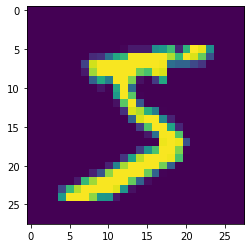

In [5]:
# for eg, the image present in the 0th index of the x_train is an image of digit '5', and its label is also mentioned as 
# - 5 in the y_train[0]
plt.imshow(x_train[0])
print(y_train[0])

In [6]:
#normalisation
x_train = x_train/255.0
x_test = x_test/255.0

In [7]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy')>0.99:
            
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True
            

In [18]:
# building the model
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape =(28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 11, 11, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 batch_normalization_1 (Batc  (None, 6, 6, 32)        

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#object of MyCallback
callbacks = MyCallback()

#fitting the model
model.fit(x_train,y_train, epochs=10,validation_data=(x_test,y_test) ,callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.3031 - accuracy: 0.9130 - val_loss: 0.0632 - val_accuracy: 0.9805
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1036 - accuracy: 0.9722 - val_loss: 0.0307 - val_accuracy: 0.9896
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0788 - accuracy: 0.9782 - val_loss: 0.0347 - val_accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 53s 29ms/step - loss: 0.0689 - accuracy: 0.9815 - val_loss: 0.0330 - val_accuracy: 0.9905
Epoch 5/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0577 - accuracy: 0.9851 - val_loss: 0.0361 - val_accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0487 - accuracy: 0.9866 - val_loss: 0.0299 - val_accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0464 - accuracy: 0.9880 - val_loss: 0.0216 -

In [21]:
model.save("mnistCNN2.h5")


In [23]:
# converting h5 model into tfjs model (terminal commmand)
! tensorflowjs_converter --input_format keras mnistCNN2.h5 .


2021-12-18 00:33:05.561879: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-12-18 00:33:05.562247: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
